# 🧐 Первичный анализ данных: Банковский маркетинг

## 🎯 Ключевые цели
Первичный осмотр данных на наличие пропусков, дубликатов, аномалий для дальнейшей очистки данных, а также базовый просмотр распределений данных для понимания использования дальнейших методов анализа и последующего создания модели.

---

## 📋 Этапы первичного анализа

### 1. Подготовка данных
- Импорт библиотеки `pandas`
- Загрузка файла с данными о банковском маркетинге
- Импорт пользовательских функций для удобства анализа

### 2. Общий осмотр данных
- **Структура данных**: количество строк и столбцов, названия признаков
- **Типы данных**: проверка соответствия типов данных ожидаемым (int, float, object, datetime)
- **Предварительный просмотр**: head(), tail(), sample() для понимания содержания
- **Проверка на дубликаты**: выявление полных дубликатов строк

### 3. Анализ числовых признаков
- **Базовые статистики**: describe() для числовых колонок
- **Выявление аномалий**: поиск выбросов через визуализацию (boxplot)
- **Построение распределений**: гистограммы для ключевых числовых переменных (возраст, длительность контакта и др.)

### 4. Анализ категориальных признаков
- **Уникальные значения**: анализ уникальных категорий и их частот
- **Проверка на аномалии**: нестандартные или редкие категории, опечатки

---

## 📊 Итоги первичного анализа
На основе проведенного анализа будут сформулированы выводы о качестве данных, определены направления для очистки (обработка пропусков, выбросов, категориальных переменных) и подготовлена основа для полноценного исследовательского анализа (EDA) и построения прогнозной модели.

## 1.1. Импорт библиотек

In [45]:

import pandas as pd

from utils import (
joinpath,
hist_boxplot
)

## 1.2. Загрузка данных с настройками

In [46]:
# Настройка для `bank-additional-full.csv`
bank_additional_full_options = {
    "filepath_or_buffer": joinpath("data", "bank-additional-full.csv"),
    "sep": ";",
    "na_values": "unknown",
}

bank_additional_full_df = pd.read_csv(**bank_additional_full_options)

## 2.1. Структура данных

In [47]:
print("Всего строк: {}.\nКоличество столбцов: {}.".format(*bank_additional_full_df.shape))

Всего строк: 41188.
Количество столбцов: 21.


In [48]:
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Видим, что всего 41188 строк, 21 столбцов, один из которых целевая y, остальные столбцы уже отформатированы по PEP-8 поэтому ничего не требуется.

## 2.2. Типы столбцов

In [49]:
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Типы данных определенны вполне корректно имеются 11 строковых представлений и 10 числовых. А так же, в некоторых столбцах видим пропуски.

In [50]:
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


По первым строкам все нормально.

## 2.3. Дубликаты и пропуски

In [51]:
bank_additional_full_df.duplicated().sum()

np.int64(12)

Было выявлено 12 полных дубликатов.

In [52]:
bank_additional_full_df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Достаточно много пропусков в default.

## 3. Числовые признаки

In [53]:
bank_additional_full_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Данные на первый взгляд не имеют как таковых аномалий, требуется подтвердить это графиками. Только возможно минимальный возраст, возможно с другим законодательством можно с 16-17.

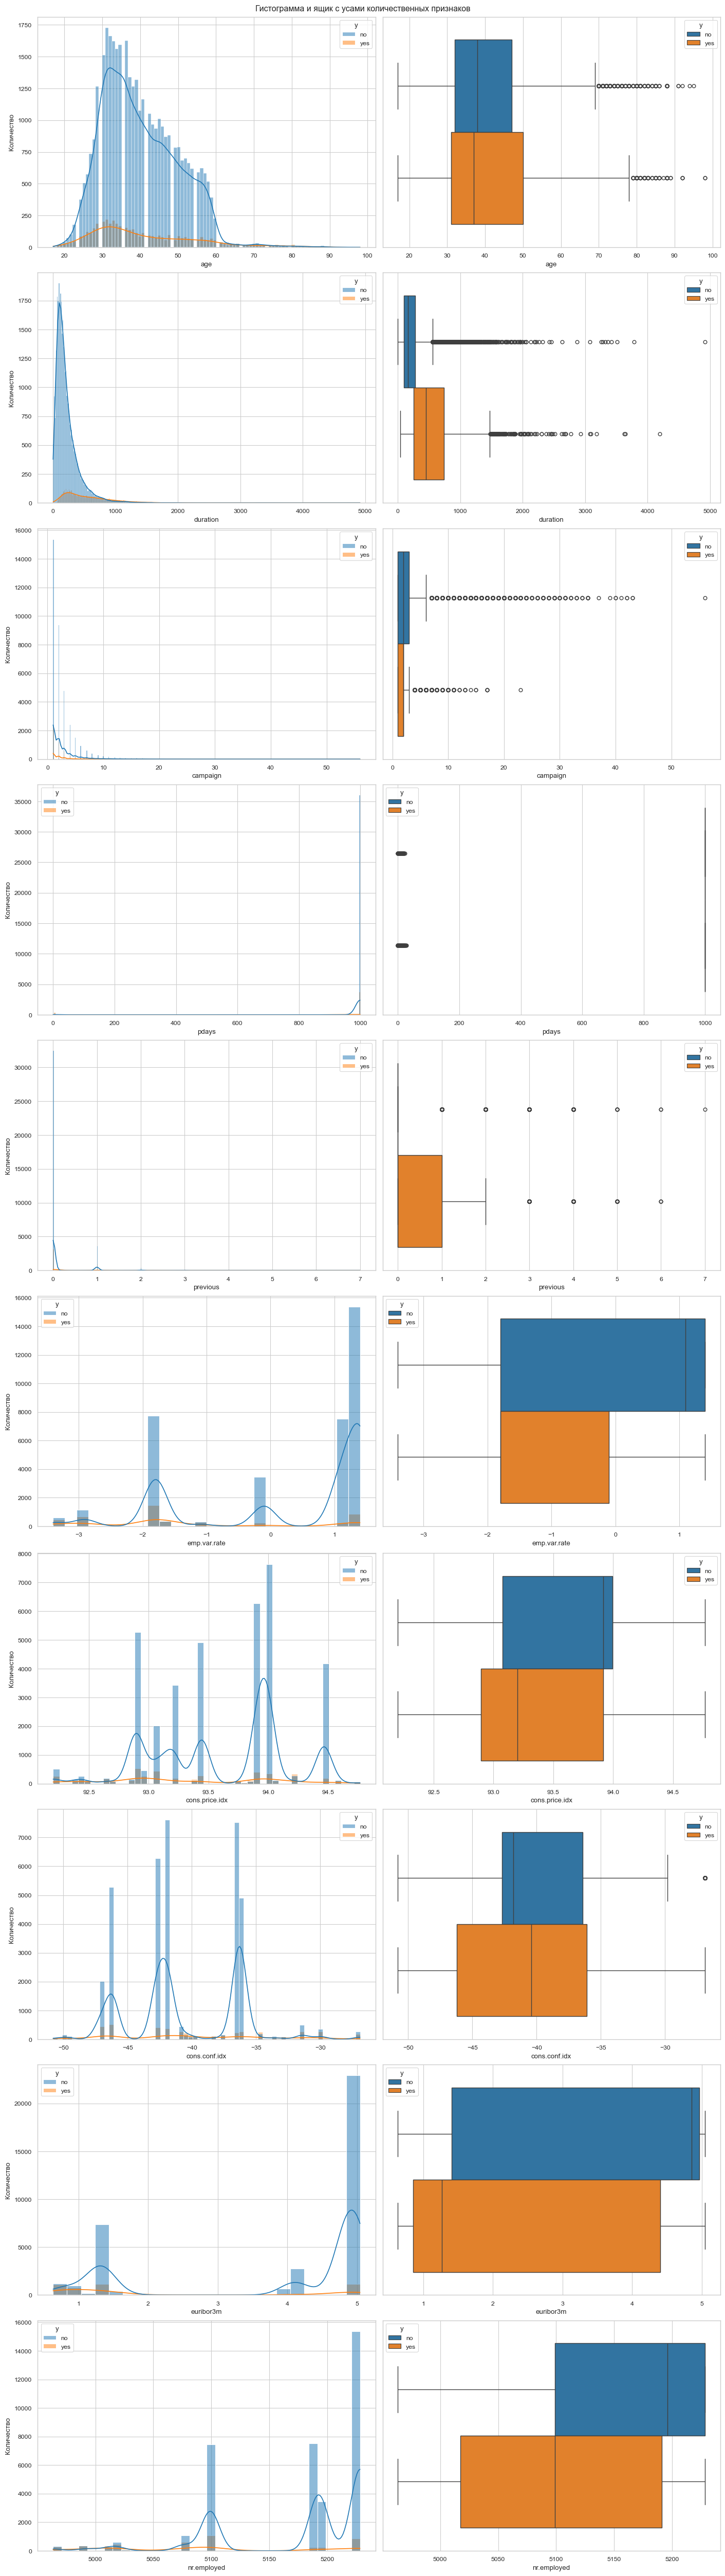

In [54]:
hist_boxplot(bank_additional_full_df, bank_additional_full_df.select_dtypes(exclude=["object", "category"]).columns, kde=True, hue="y")

По графикам видно, что в основном числовые признаки имеют большой хвост вправо для модели перед использованием будем использовать `RobustScaler`

## 4. Категориальные признаки

In [55]:
cat_df = bank_additional_full_df.select_dtypes(include=["object", "category"])

cat_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


Выведим уникальные значения каждой колонки.

In [56]:
for col in cat_df.columns:
    print(cat_df[col].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
['married' 'single' 'divorced' nan]
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
['no' nan 'yes']
['no' 'yes' nan]
['no' 'yes' nan]
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


Значения вполне корректны, но нужно исключить Nan значения они будут лишь мешать дальнейшему анализу. Можно объединить базовые образование 4,6,9 лет в одну категории.

In [57]:
for col in cat_df.columns:
    print(cat_df[col].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64
default
no     32588
yes        3
Name: count, dtype: int64
housing
yes    21576
no     18622
Name: count, dtype: int64
loan
no     33950
yes     6248
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: int64
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name:

Есть колонки или категории в них, которые почти не используются данных слишком мало, чтобы говорить допустим о влиянии default на целевую переменную ведь в основе все значения `no`

# Итоги первичного анализа данных

## 📊 Общая оценка данных

### ✅ Положительные аспекты:
- Данные в целом качественные и структурированные
- Присутствует минимальное количество дубликатов (всего 12 записей)

### ⚠️ Выявленные проблемы:

#### 1. Пропуски в данных
- **Колонка `default`**: значительное количество пропусков
- **Проблема**: 3 значения "yes" на 32,588 записей делают анализ этой категории статистически бессмысленным
- **Решение**: исключить колонку из анализа

#### 2. Проблемы с категориальными признаками
**Образование (`education`):**
- Наличие значений: "basic.4y", "basic.6y", "basic.9y"
- **Проблема**: излишняя детализация без аналитической ценности
- **Решение**: объединить в одну категорию "basic"

#### 3. Распределение числовых признаков
- Сильный правый скос (длинный хвост) у некоторых числовых признаков
- **Влияние на модели**: выбросы помешают работе логистической регрессии
- **Решение**: использовать `RobustScaler` для масштабирования

---

После очистки данных сможем приступить к выявление самих признаков, которые наиболее влияют на целувую `y`.